 # Importing necesary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline

### Loading in dataset

In [5]:
df = pd.read_csv('Energy_consumption.csv')

# View the first few rows
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [6]:
# Shape of the dataset (rows, columns)
df.shape



(1000, 11)

In [7]:
# List of all column names
df.columns


Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [8]:
# Data types of each column
df.dtypes


Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [9]:
# Summary statistics for numerical columns
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [10]:
df.duplicated().sum()

np.int64(0)

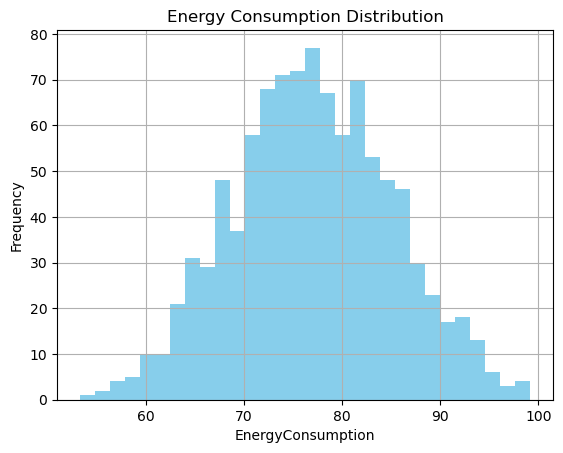

In [11]:
import matplotlib.pyplot as plt

df['EnergyConsumption'].hist(bins=30, color='skyblue')
plt.title('Energy Consumption Distribution')
plt.xlabel('EnergyConsumption')
plt.ylabel('Frequency')
plt.show()

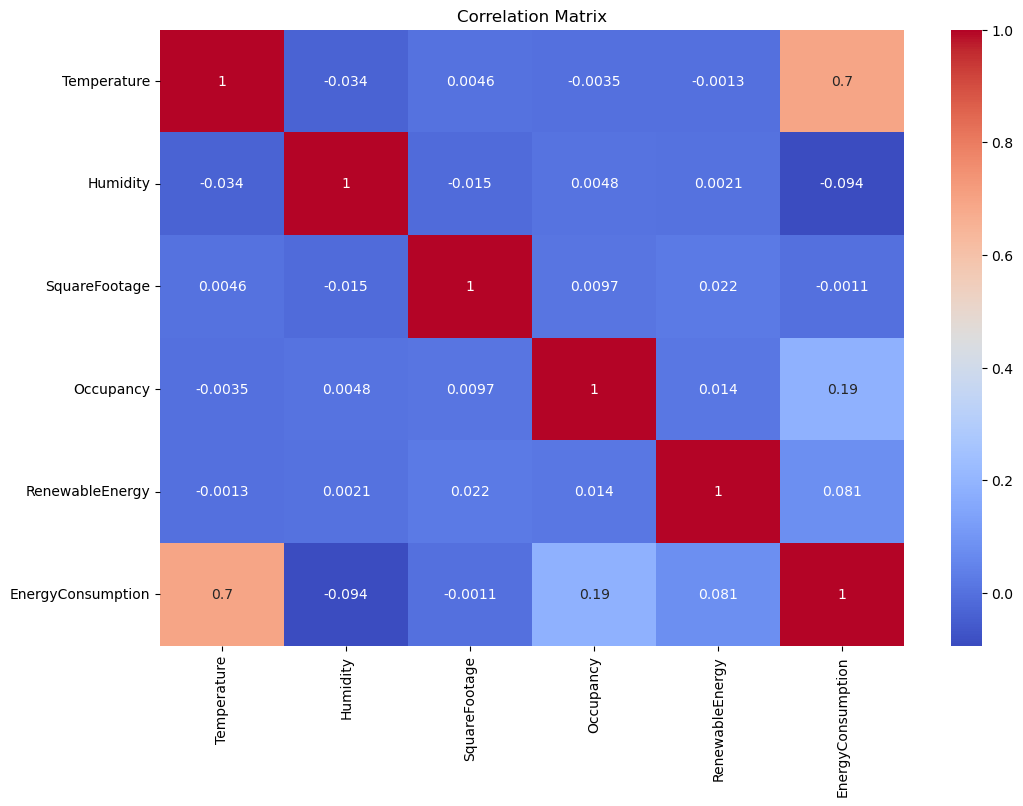

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Solving for outliers

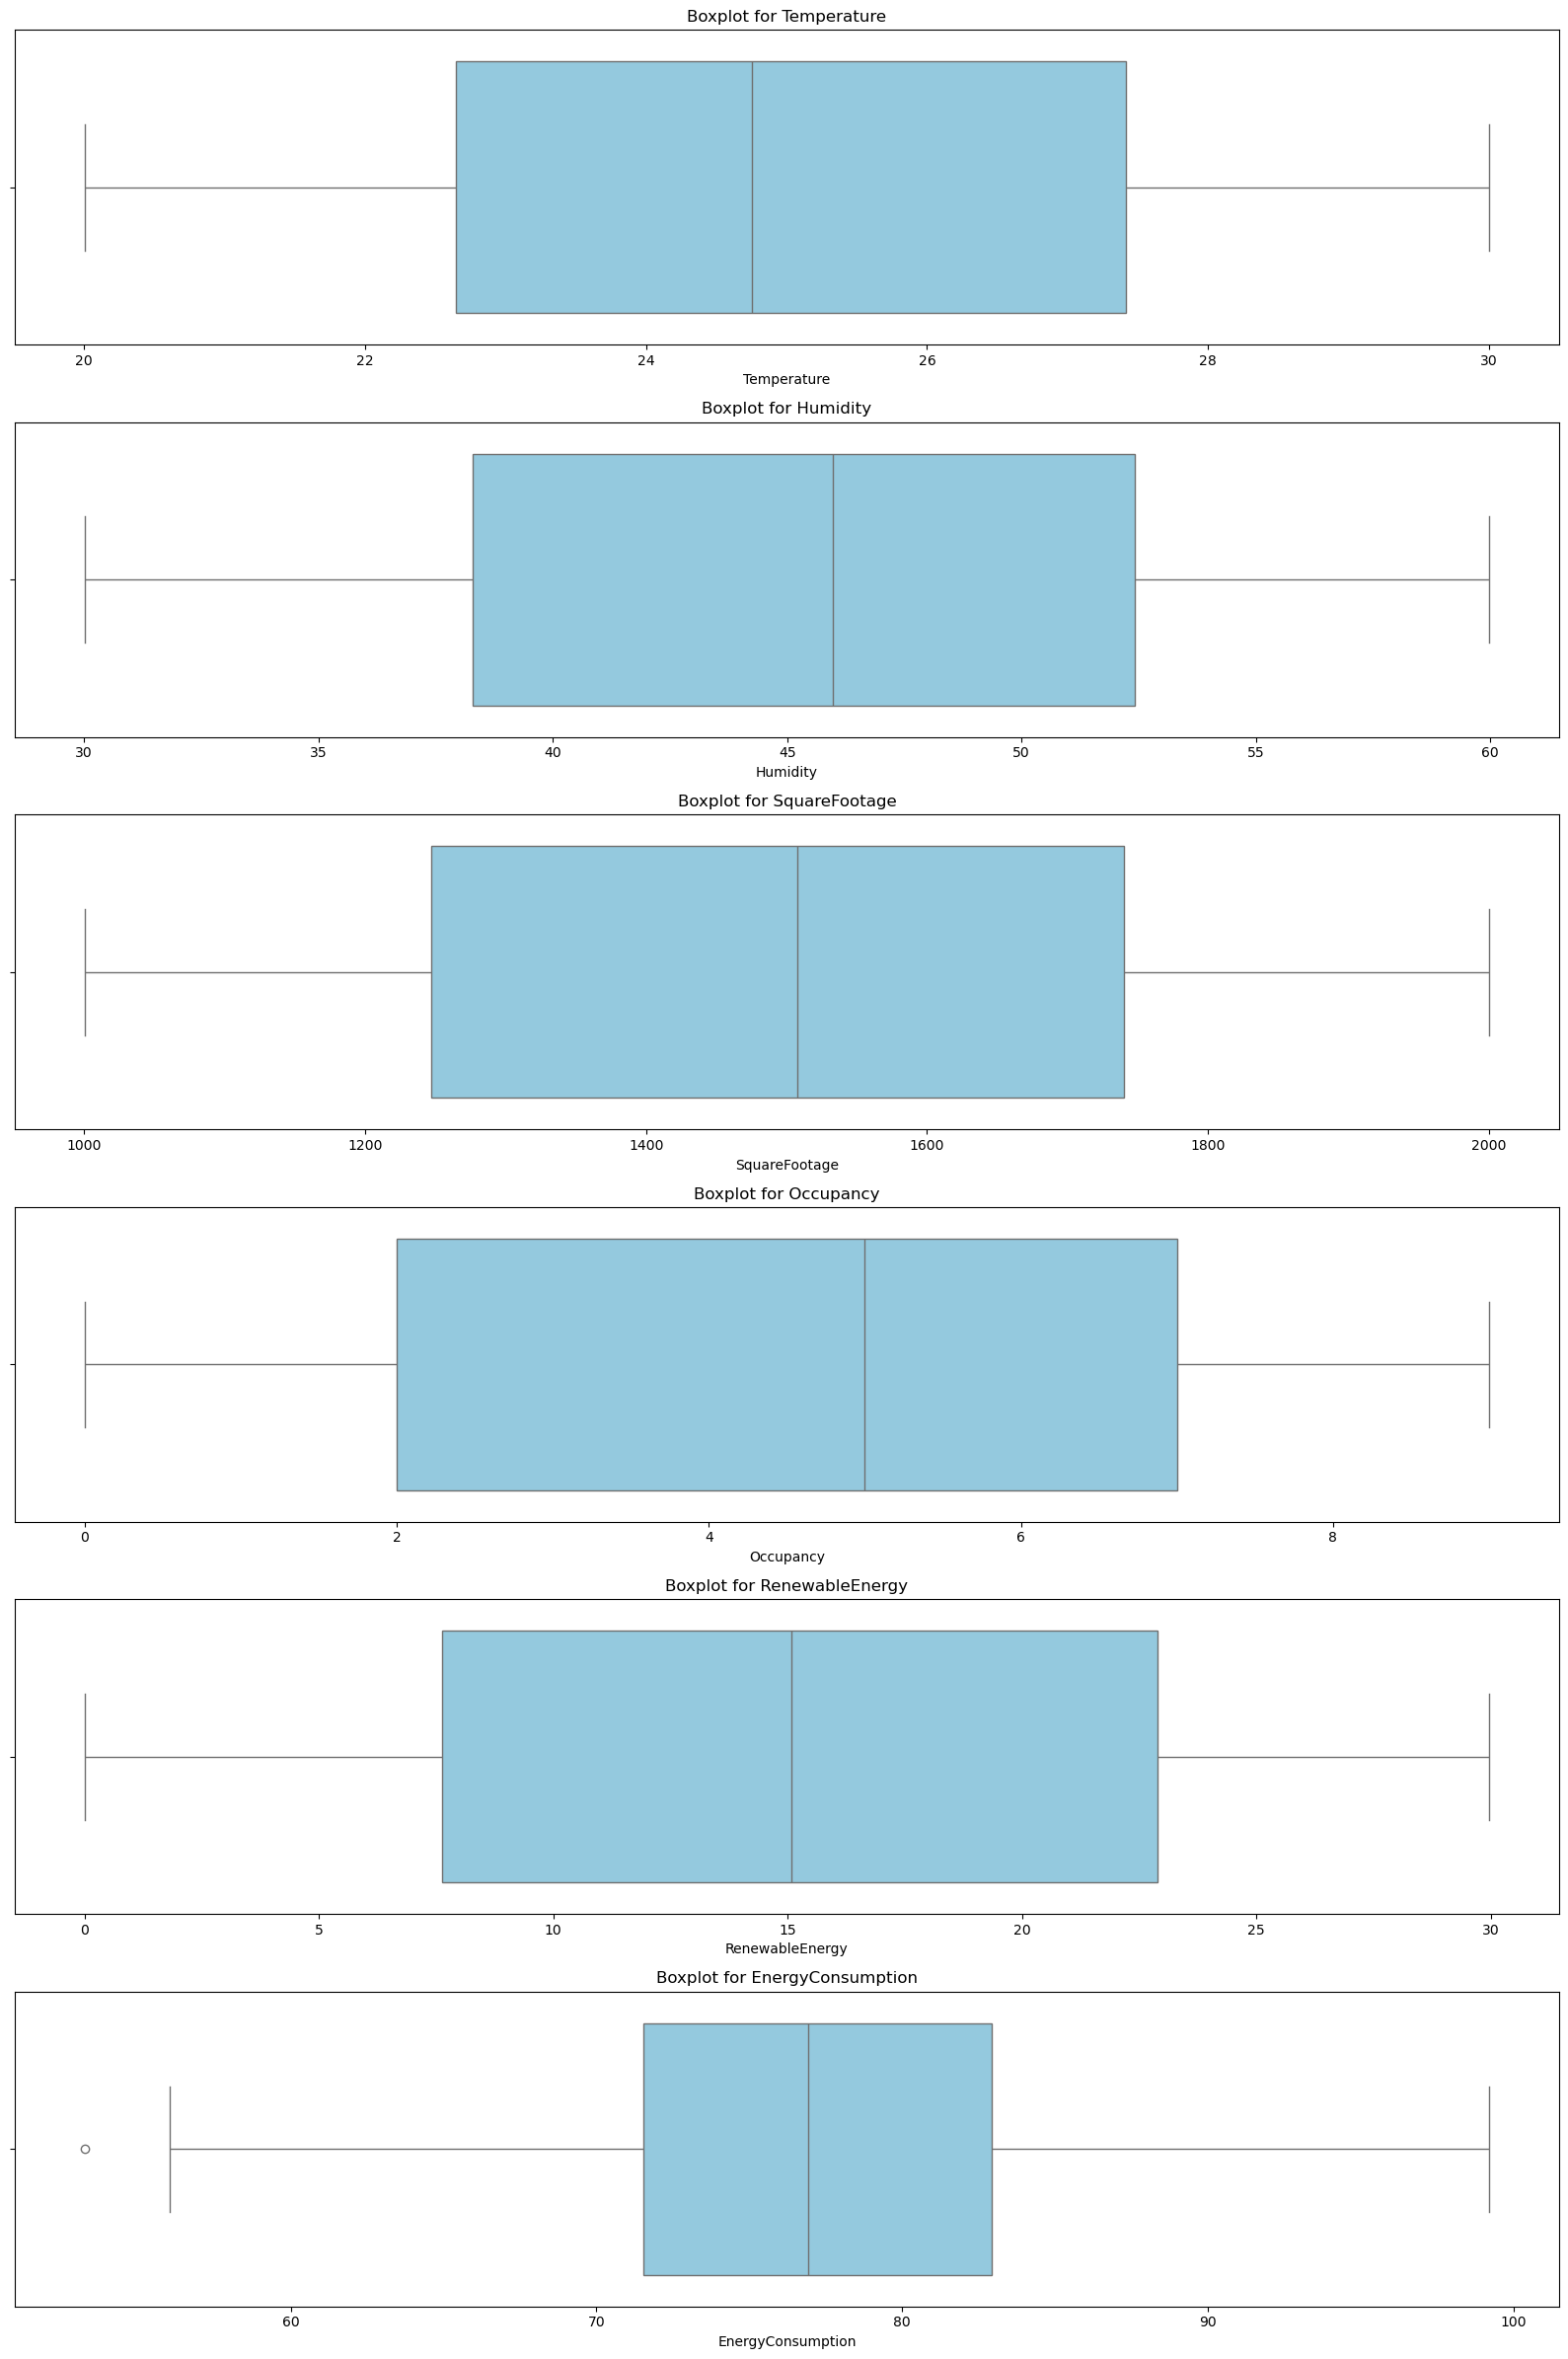

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set plot size
plt.figure(figsize=(16, len(numeric_cols) * 4))

# Plot each numeric column in a subplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()


# Solving for Skewness

# Encoding 

In [14]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('Energy_consumption.csv')

# Define the categorical columns to be encoded
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

# Use pd.get_dummies() to perform one-hot encoding.
# The 'drop_first=True' argument is used to avoid multicollinearity.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Save the new encoded DataFrame to a new CSV file
df_encoded.to_csv('Energy_consumption_encoded.csv', index=False)

# Display the first 5 rows of the new encoded dataset to confirm the changes
print(df_encoded.head())

# Display the data types and column information of the new encoded dataset
print(df_encoded.info())

             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   RenewableEnergy  EnergyConsumption  HVACUsage_On  LightingUsage_On  \
0         2.774699          75.364373          True             False   
1        21.831384          83.401855          True              True   
2         6.764672          78.270888         False             False   
3         8.623447          56.519850         False              True   
4         3.071969          70.811732          True             False   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0              True    

In [15]:
print("import pandas as pd")
print("df = pd.read_csv('Energy_consumption_encoded.csv')")
print("X = df.drop(columns=['EnergyConsumption', 'Timestamp'])")
print("y = df['EnergyConsumption']")
print("print(X.head())")
print("print(y.head())")
print("```")

import pandas as pd
df = pd.read_csv('Energy_consumption_encoded.csv')
X = df.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df['EnergyConsumption']
print(X.head())
print(y.head())
```


# Spliting the dataset

In [16]:
import pandas as pd

# Load the encoded dataset
df = pd.read_csv('Energy_consumption_encoded.csv')

# Define the features (X) by dropping the 'EnergyConsumption' and 'Timestamp' columns
X = df.drop(columns=['EnergyConsumption', 'Timestamp'])

# Define the target variable (y)
y = df['EnergyConsumption']

In [17]:
import pandas as pd

# Load the encoded dataset
df = pd.read_csv('Energy_consumption_encoded.csv')

# Define the features (X) by dropping the 'EnergyConsumption' and 'Timestamp' columns
X = df.drop(columns=['EnergyConsumption', 'Timestamp'])

# Define the target variable (y) as the 'EnergyConsumption' column
y = df['EnergyConsumption']

# You can print the first few rows of X and y to confirm the split
print("Features (X) head:")
print(X.head())

print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  \
0    25.139433  43.431581    1565.693999          5         2.774699   
1    27.731651  54.225919    1411.064918          1        21.831384   
2    28.704277  58.907658    1755.715009          2         6.764672   
3    20.080469  50.371637    1452.316318          1         8.623447   
4    23.097359  51.401421    1094.130359          9         3.071969   

   HVACUsage_On  LightingUsage_On  DayOfWeek_Monday  DayOfWeek_Saturday  \
0          True             False              True               False   
1          True              True             False                True   
2         False             False             False               False   
3         False              True             False               False   
4          True             False             False               False   

   DayOfWeek_Sunday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
0             False               F

In [18]:
import pandas as pd

# Load the encoded dataset
df = pd.read_csv('Energy_consumption_encoded.csv')

# Define the features (X) by dropping the 'EnergyConsumption' and 'Timestamp' columns
X = df.drop(columns=['EnergyConsumption', 'Timestamp'])

# Define the target variable (y)
y = df['EnergyConsumption']

# Train and Test

In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the encoded dataset
df_encoded = pd.read_csv('Energy_consumption_encoded.csv')

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df_encoded['EnergyConsumption']

# Split the data into training (80%) and testing (20%) sets
# random_state is used for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


# linear Regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the encoded dataset
df_encoded = pd.read_csv('Energy_consumption_encoded.csv')

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df_encoded['EnergyConsumption']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print a confirmation message
print("Linear Regression model has been successfully trained.")

Linear Regression model has been successfully trained.


In [21]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the encoded dataset
df_encoded = pd.read_csv('Energy_consumption_encoded.csv')

# Define features (X) and target (y)
X = df_encoded.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df_encoded['EnergyConsumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model has been successfully trained.")'''

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\n\n# Load the encoded dataset\ndf_encoded = pd.read_csv(\'Energy_consumption_encoded.csv\')\n\n# Define features (X) and target (y)\nX = df_encoded.drop(columns=[\'EnergyConsumption\', \'Timestamp\'])\ny = df_encoded[\'EnergyConsumption\']\n\n# Split data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Initialize the Linear Regression model\nmodel = LinearRegression()\n\n# Train the model using the training data\nmodel.fit(X_train, y_train)\n\nprint("Linear Regression model has been successfully trained.")'

# Model evaluation

In [22]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Raw data from the previously retrieved CSV content
raw_data = """Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
2022-01-01 00:00:00,25.1394334377269,43.43158120480281,1565.6939992511175,5,On,Off,2.774698791658742,Monday,No,75.36437339539214
2022-01-01 01:00:00,27.731650520792968,54.225918580233085,1411.064918331917,1,On,On,21.831384152500608,Saturday,No,83.40185495035139
2022-01-01 02:00:00,28.704276857248125,58.907657743033184,1755.71500922237,2,Off,Off,6.76467168191291,Sunday,No,78.27088774061066
2022-01-01 03:00:00,20.080469485298178,50.3716371457499,1452.316318334375,1,Off,On,8.623446893471096,Wednesday,No,56.51985048548002
2022-01-01 04:00:00,23.09735925505204,51.40142134361278,1094.1303586981196,9,On,Off,3.0719692157166323,Friday,No,70.81173246793318
2022-01-01 05:00:00,29.576037393658908,36.82426323380886,1871.7091797360983,6,Off,Off,17.62668982389795,Sunday,Yes,84.32188519433718
2022-01-01 06:00:00,25.13116712267887,35.70962155267958,1607.0012284749637,6,On,Off,24.26470232698351,Friday,Yes,76.16579090213895
2022-01-01 07:00:00,23.182844248720986,31.67991978011051,1633.9553295431137,8,Off,Off,27.517099250037322,Thursday,Yes,74.1319061773031
2022-01-01 08:00:00,25.391999374256482,46.399364049557406,1240.309223721734,6,On,Off,2.3075954692088576,Sunday,No,78.20623587095885
2022-01-01 09:00:00,22.212549424277597,32.41846388370173,1705.4203356236915,1,On,Off,29.140070981014404,Tuesday,No,77.99221370196022
2022-01-01 10:00:00,28.0648135792427,36.45147178564109,1341.4671285403147,2,Off,Off,0.3522383966403897,Monday,Yes,82.27443448386548
2022-01-01 11:00:00,23.422546256146845,30.527342157466457,1604.4183548074382,6,On,On,19.529548154656723,Thursday,Yes,73.27866950427382
2022-01-01 12:00:00,25.388888490671448,47.60101803425757,1244.6189139899486,1,On,Off,21.79744359722318,Tuesday,Yes,84.14477565753458
2022-01-01 13:00:00,20.058737855510582,41.861641594454376,1806.052631578324,2,Off,Off,6.384949152471242,Friday,Yes,60.0225185622203
2022-01-01 14:00:00,26.731524781805255,37.29787044961106,1419.7490137965287,6,Off,Off,12.074223142216763,Friday,Yes,81.18318756246354
2022-01-01 15:00:00,22.10024262178738,56.09917871988325,1144.8062949047298,8,Off,On,10.900770033732996,Sunday,No,74.081256288494
2022-01-01 16:00:00,29.325575928787117,56.95417356701815,1620.8617811356273,0,On,On,15.453999472973807,Friday,No,89.4982076601557
2022-01-01 17:00:00,23.742447494814922,42.24584548342733,1413.595106864955,1,On,Off,3.940678287777141,Sunday,Yes,72.87244263642421
2022-01-01 18:00:00,27.524189220859462,47.172429679424546,1832.1997785770345,9,On,Off,19.688958309220318,Thursday,No,83.8998965998896
2022-01-01 19:00:00,27.63139001845522,36.14029374467184,1251.553720835332,4,On,On,8.848082816473534,Wednesday,Yes,82.07757940317406
2022-01-01 20:00:00,28.7049945527175,59.931894786121376,1211.2618021121182,9,On,On,11.703977742489942,Friday,Yes,94.236287728335
2022-01-01 21:00:00,21.101111782566015,30.41800645418693,1677.105260698892,3,Off,Off,14.51720370832993,Sunday,Yes,59.672380432970826
2022-01-01 22:00:00,23.000919803937837,43.63838293291814,1228.3223766902736,1,Off,Off,4.302844586055179,Saturday,No,70.23522761734993
2022-01-01 23:00:00,24.749057659504686,57.216848654263046,1253.708860396828,6,On,On,0.6603375462558703,Tuesday,No,78.39420777459377
2022-01-02 00:00:00,26.729367191665858,46.19408776943607,1533.8875228293596,8,On,Off,18.5810340057255,Wednesday,No,87.84164465666763
2022-01-02 01:00:00,22.575924329206178,57.7495719227239,1040.2062146036978,8,Off,On,8.906945509097325,Tuesday,Yes,72.92984426206768
2022-01-02 02:00:00,27.011513197244874,52.637571884657305,1701.2553405115032,9,On,On,24.051355077458528,Thursday,No,86.66909405376278
2022-01-02 03:00:00,26.570000593742623,43.330311963375614,1126.0627981873615,7,Off,On,2.9434034323461225,Thursday,No,80.41142775984329
2022-01-02 04:00:00,21.820077577118944,56.855188125958406,1289.616032810379,3,Off,On,25.513774644213942,Tuesday,Yes,64.21209800102363
2022-01-02 05:00:00,23.220629928291007,46.073879432102466,1649.5103531928776,2,Off,On,18.270528189168942,Tuesday,No,74.16033755004982
2022-01-02 06:00:00,28.875374569208283,31.803130453234026,1887.2017226982111,5,On,On,24.46883621156326,Tuesday,Yes,81.04958057295511
2022-01-02 07:00:00,20.833491610497568,51.147007018014364,1096.7031280679794,1,On,Off,21.865100350797228,Saturday,No,70.30817192579988
2022-01-02 08:00:00,27.465641201404082,34.9409910367269,1491.2879488851015,9,On,Off,4.6457386056945404,Thursday,No,82.28439185280472
2022-01-02 09:00:00,20.623500489834765,50.14503354220139,1036.4623172912152,6,Off,On,0.3722012648189066,Saturday,No,59.847392688307885
2022-01-02 10:00:00,27.314811265727286,42.93605505297437,1876.510298961869,4,On,Off,1.1813311411593264,Tuesday,Yes,82.50403686398842
2022-01-02 11:00:00,27.42511354993544,32.394788065588216,1155.2301001435485,9,On,Off,8.166146956672918,Monday,Yes,82.78244589126273
2022-01-02 12:00:00,24.07915813451661,54.09504887445641,1850.3220231803862,7,Off,Off,21.060814255417917,Tuesday,Yes,74.67411328167944
2022-01-02 13:00:00,29.913829988984812,53.34075278909026,1924.1861207571112,0,On,Off,25.84805422710293,Thursday,No,86.88913818269737
2022-01-02 14:00:00,24.521372987583916,42.27647348582312,1654.9299772328145,7,On,Off,1.6471723322743026,Saturday,Yes,78.54242641942929
2022-01-02 15:00:00,21.898785431279215,48.633514626021764,1958.9635358554863,4,On,On,20.21773265658062,Monday,Yes,77.22845715853467
2022-01-02 16:00:00,23.516264720993824,52.37155796010059,1517.168540999046,7,On,Off,8.270639173483916,Saturday,Yes,73.73515145603137
2022-01-02 17:00:00,27.148116664252598,43.120866240444116,1296.5818068796584,8,On,Off,16.99702392488144,Saturday,Yes,91.84340824868657
2022-01-02 18:00:00,23.574353632517656,52.85166419960819,1491.880064573067,2,Off,Off,24.46090952239937,Thursday,No,73.35070513237227
2022-01-02 19:00:00,20.51618553995076,40.918499706064985,1114.2301237129745,8,Off,On,20.489097790934643,Monday,Yes,66.20209750906106
2022-01-02 20:00:00,23.159190043519658,33.08814922387616,1183.4936058135675,6,Off,On,15.654792218150218,Friday,Yes,77.85177634998958
2022-01-02 21:00:00,29.98804611564981,51.19663001184678,1516.7527033111173,2,On,Off,16.10496033318202,Monday,No,90.98147610427823
2022-01-02 22:00:00,22.87904856617314,30.35776228999121,1162.6593544131147,7,On,On,13.390538929932509,Monday,Yes,81.91707933111346
2022-01-02 23:00:00,24.617958714158057,49.041225548641044,1666.0436474922356,6,Off,On,21.600154740134737,Tuesday,Yes,70.22461753933254
2022-01-03 00:00:00,27.352681109839732,36.25924919238827,1024.9989858937445,6,Off,On,22.175022181923556,Saturday,No,88.73376918202806
2022-01-03 01:00:00,29.436789507453597,48.848449413101044,1234.0853680866385,2,Off,Off,6.662874484173437,Thursday,Yes,76.55502512631448
2022-01-03 02:00:00,21.754026426655436,45.5386430923988,1514.8270370715445,4,Off,Off,9.846127121574138,Tuesday,No,62.05505493579667
2022-01-03 03:00:00,22.124213759030667,47.34391565524731,1919.119996208746,6,Off,Off,5.352018638001322,Friday,No,62.00189386466329
2022-01-03 04:00:00,21.32477612950562,33.61505670735282,1857.2683694193852,9,On,On,13.52386674371843,Tuesday,Yes,80.45212742101157
2022-01-03 05:00:00,22.086811922474794,43.83891693254598,1325.6002039883774,5,Off,Off,12.274820353976573,Monday,No,64.71822006448231
2022-01-03 06:00:00,29.956879445435295,56.78880560031188,1864.7323664037672,8,On,Off,4.93873793676906,Friday,Yes,91.87196450897233
2022-01-03 07:00:00,22.466458319173128,45.228409421067546,1902.8038240327674,6,Off,On,0.5770304431135131,Saturday,No,69.69226303092958
2022-01-03 08:00:00,21.10053158610883,52.70577939457823,1896.8160791752975,7,Off,Off,25.007682077563224,Tuesday,No,63.85097612559908
2022-01-03 09:00:00,25.023202382650055,43.58649903471925,1434.5263111079676,1,Off,Off,2.1751376627840524,Thursday,Yes,68.80528577996184
2022-01-03 10:00:00,24.56121815223363,37.03931988895259,1689.4554548228862,3,Off,Off,21.331712339087563,Thursday,Yes,76.30130928798148
2022-01-03 11:00:00,27.34490228945882,33.68329828659663,1187.6137331373209,2,Off,On,17.663953484228607,Saturday,No,84.03868416047865
2022-01-03 12:00:00,26.209435413222995,40.77160427979762,1038.6767198939717,1,Off,Off,14.779714452460693,Monday,No,77.67379217139589
2022-01-03 13:00:00,26.210702266888138,42.084182961399954,1098.7993275437675,7,Off,Off,1.554091825506374,Sunday,Yes,78.9122501589774
2022-01-03 14:00:00,21.50172634196033,43.35331518509382,1546.5082455132003,9,Off,Off,20.75590320303998,Tuesday,Yes,64.04242487840129
2022-01-03 15:00:00,25.38274545985014,51.90269994964382,1350.7565854072911,0,Off,Off,27.7480438663646,Tuesday,No,78.18728130362722
2022-01-03 16:00:00,21.203472435117007,49.61036981078196,1529.6571154960998,7,Off,On,17.187331454964607,Tuesday,No,63.39384819262403
2022-01-03 17:00:00,21.530255220213963,42.016883386284604,1660.5352671428975,8,On,Off,7.675986826636647,Sunday,No,76.1061781008304
2022-01-03 18:00:00,24.501785568140253,48.58331043267368,1631.6347139345492,9,Off,Off,24.696387867372568,Monday,Yes,60.14423797781192
2022-01-03 19:00:00,24.29072347206709,36.98773403191924,1847.3956285621412,6,On,Off,10.955154959932422,Thursday,No,80.19264551142784
2022-01-03 20:00:00,27.336620808382346,50.87667729455613,1143.1051769409855,7,On,On,27.622484462627945,Wednesday,Yes,86.22364506793032
2022-01-03 21:00:00,20.735715500615072,48.506636238037885,1836.5426514662836,4,Off,On,9.295439071913755,Friday,No,53.26327834004948
2022-01-03 22:00:00,22.787858297629416,43.9510486471958,1134.0026160549453,6,Off,Off,20.362582609033957,Monday,Yes,64.963183670906
2022-01-03 23:00:00,21.652937745810068,56.13704538377151,1140.6015497610567,8,Off,On,19.512862046045367,Tuesday,No,66.43892064888173
2022-01-04 00:00:00,25.080881384605885,59.67153433028882,1897.7022242369349,8,Off,Off,14.391799747910376,Friday,No,75.91390632236421
2022-01-04 01:00:00,25.792511525815144,33.892215875037266,1849.8295811087282,7,On,Off,25.875969475523284,Wednesday,Yes,84.1914674081221
2022-01-04 02:00:00,26.38607928227496,43.295777618025824,1851.5977412346076,5,On,Off,17.471964829862657,Sunday,Yes,75.25176382432235
2022-01-04 03:00:00,22.140257043395216,49.42487793686675,1037.2068852025438,7,Off,On,3.329907540458863,Tuesday,Yes,75.0144709786204
2022-01-04 04:00:00,24.175776484229303,41.80015037049925,1198.62522424261,6,Off,Off,18.470624103976128,Sunday,No,69.36574478049252
2022-01-04 05:00:00,24.66814180599299,43.140910417898546,1310.8749121436545,0,Off,On,22.936053481520815,Saturday,Yes,78.04604233404717
2022-01-04 06:00:00,20.830692156172198,52.19017625682678,1772.0857079256311,7,Off,Off,21.71119540606205,Thursday,Yes,67.48478775030759
2022-01-04 07:00:00,25.70272908051244,53.31665481703489,1050.3176022812484,8,On,Off,26.817107779448893,Sunday,No,78.25428789721424
2022-01-04 08:00:00,22.28517562664769,40.65991340311216,1688.8908261560819,4,On,On,19.455960671298747,Tuesday,No,74.84338094009375
2022-01-04 09:00:00,20.357297197814656,52.95666984491464,1150.2851690246343,8,On,Off,21.0683111197589,Monday,No,64.64191192860432
2022-01-04 10:00:00,29.645292782200073,42.5136062106093"""
df = pd.read_csv(StringIO(raw_data))

# Encode categorical columns to prepare the data again
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop any rows that contain NaN values
df_encoded.dropna(inplace=True)

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df_encoded['EnergyConsumption']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4.26
Mean Squared Error (MSE): 30.15
R-squared (R2) Score: 0.70


#  Random Forest Regressor

In [23]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Raw data from the previously retrieved CSV content
raw_data = """Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
2022-01-01 00:00:00,25.1394334377269,43.43158120480281,1565.6939992511175,5,On,Off,2.774698791658742,Monday,No,75.36437339539214
2022-01-01 01:00:00,27.731650520792968,54.225918580233085,1411.064918331917,1,On,On,21.831384152500608,Saturday,No,83.40185495035139
2022-01-01 02:00:00,28.704276857248125,58.907657743033184,1755.71500922237,2,Off,Off,6.76467168191291,Sunday,No,78.27088774061066
2022-01-01 03:00:00,20.080469485298178,50.3716371457499,1452.316318334375,1,Off,On,8.623446893471096,Wednesday,No,56.51985048548002
2022-01-01 04:00:00,23.09735925505204,51.40142134361278,1094.1303586981196,9,On,Off,3.0719692157166323,Friday,No,70.81173246793318
2022-01-01 05:00:00,29.576037393658908,36.82426323380886,1871.7091797360983,6,Off,Off,17.62668982389795,Sunday,Yes,84.32188519433718
2022-01-01 06:00:00,25.13116712267887,35.70962155267958,1607.0012284749637,6,On,Off,24.26470232698351,Friday,Yes,76.16579090213895
2022-01-01 07:00:00,23.182844248720986,31.67991978011051,1633.9553295431137,8,Off,Off,27.517099250037322,Thursday,Yes,74.1319061773031
2022-01-01 08:00:00,25.391999374256482,46.399364049557406,1240.309223721734,6,On,Off,2.3075954692088576,Sunday,No,78.20623587095885
2022-01-01 09:00:00,22.212549424277597,32.41846388370173,1705.4203356236915,1,On,Off,29.140070981014404,Tuesday,No,77.99221370196022
2022-01-01 10:00:00,28.0648135792427,36.45147178564109,1341.4671285403147,2,Off,Off,0.3522383966403897,Monday,Yes,82.27443448386548
2022-01-01 11:00:00,23.422546256146845,30.527342157466457,1604.4183548074382,6,On,On,19.529548154656723,Thursday,Yes,73.27866950427382
2022-01-01 12:00:00,25.388888490671448,47.60101803425757,1244.6189139899486,1,On,Off,21.79744359722318,Tuesday,Yes,84.14477565753458
2022-01-01 13:00:00,20.058737855510582,41.861641594454376,1806.052631578324,2,Off,Off,6.384949152471242,Friday,Yes,60.0225185622203
2022-01-01 14:00:00,26.731524781805255,37.29787044961106,1419.7490137965287,6,Off,Off,12.074223142216763,Friday,Yes,81.18318756246354
2022-01-01 15:00:00,22.10024262178738,56.09917871988325,1144.8062949047298,8,Off,On,10.900770033732996,Sunday,No,74.081256288494
2022-01-01 16:00:00,29.325575928787117,56.95417356701815,1620.8617811356273,0,On,On,15.453999472973807,Friday,No,89.4982076601557
2022-01-01 17:00:00,23.742447494814922,42.24584548342733,1413.595106864955,1,On,Off,3.940678287777141,Sunday,Yes,72.87244263642421
2022-01-01 18:00:00,27.524189220859462,47.172429679424546,1832.1997785770345,9,On,Off,19.688958309220318,Thursday,No,83.8998965998896
2022-01-01 19:00:00,27.63139001845522,36.14029374467184,1251.553720835332,4,On,On,8.848082816473534,Wednesday,Yes,82.07757940317406
2022-01-01 20:00:00,28.7049945527175,59.931894786121376,1211.2618021121182,9,On,On,11.703977742489942,Friday,Yes,94.236287728335
2022-01-01 21:00:00,21.101111782566015,30.41800645418693,1677.105260698892,3,Off,Off,14.51720370832993,Sunday,Yes,59.672380432970826
2022-01-01 22:00:00,23.000919803937837,43.63838293291814,1228.3223766902736,1,Off,Off,4.302844586055179,Saturday,No,70.23522761734993
2022-01-01 23:00:00,24.749057659504686,57.216848654263046,1253.708860396828,6,On,On,0.6603375462558703,Tuesday,No,78.39420777459377
2022-01-02 00:00:00,26.729367191665858,46.19408776943607,1533.8875228293596,8,On,Off,18.5810340057255,Wednesday,No,87.84164465666763
2022-01-02 01:00:00,22.575924329206178,57.7495719227239,1040.2062146036978,8,Off,On,8.906945509097325,Tuesday,Yes,72.92984426206768
2022-01-02 02:00:00,27.011513197244874,52.637571884657305,1701.2553405115032,9,On,On,24.051355077458528,Thursday,No,86.66909405376278
2022-01-02 03:00:00,26.570000593742623,43.330311963375614,1126.0627981873615,7,Off,On,2.9434034323461225,Thursday,No,80.41142775984329
2022-01-02 04:00:00,21.820077577118944,56.855188125958406,1289.616032810379,3,Off,On,25.513774644213942,Tuesday,Yes,64.21209800102363
2022-01-02 05:00:00,23.220629928291007,46.073879432102466,1649.5103531928776,2,Off,On,18.270528189168942,Tuesday,No,74.16033755004982
2022-01-02 06:00:00,28.875374569208283,31.803130453234026,1887.2017226982111,5,On,On,24.46883621156326,Tuesday,Yes,81.04958057295511
2022-01-02 07:00:00,20.833491610497568,51.147007018014364,1096.7031280679794,1,On,Off,21.865100350797228,Saturday,No,70.30817192579988
2022-01-02 08:00:00,27.465641201404082,34.9409910367269,1491.2879488851015,9,On,Off,4.6457386056945404,Thursday,No,82.28439185280472
2022-01-02 09:00:00,20.623500489834765,50.14503354220139,1036.4623172912152,6,Off,On,0.3722012648189066,Saturday,No,59.847392688307885
2022-01-02 10:00:00,27.314811265727286,42.93605505297437,1876.510298961869,4,On,Off,1.1813311411593264,Tuesday,Yes,82.50403686398842
2022-01-02 11:00:00,27.42511354993544,32.394788065588216,1155.2301001435485,9,On,Off,8.166146956672918,Monday,Yes,82.78244589126273
2022-01-02 12:00:00,24.07915813451661,54.09504887445641,1850.3220231803862,7,Off,Off,21.060814255417917,Tuesday,Yes,74.67411328167944
2022-01-02 13:00:00,29.913829988984812,53.34075278909026,1924.1861207571112,0,On,Off,25.84805422710293,Thursday,No,86.88913818269737
2022-01-02 14:00:00,24.521372987583916,42.27647348582312,1654.9299772328145,7,On,Off,1.6471723322743026,Saturday,Yes,78.54242641942929
2022-01-02 15:00:00,21.898785431279215,48.633514626021764,1958.9635358554863,4,On,On,20.21773265658062,Monday,Yes,77.22845715853467
2022-01-02 16:00:00,23.516264720993824,52.37155796010059,1517.168540999046,7,On,Off,8.270639173483916,Saturday,Yes,73.73515145603137
2022-01-02 17:00:00,27.148116664252598,43.120866240444116,1296.5818068796584,8,On,Off,16.99702392488144,Saturday,Yes,91.84340824868657
2022-01-02 18:00:00,23.574353632517656,52.85166419960819,1491.880064573067,2,Off,Off,24.46090952239937,Thursday,No,73.35070513237227
2022-01-02 19:00:00,20.51618553995076,40.918499706064985,1114.2301237129745,8,Off,On,20.489097790934643,Monday,Yes,66.20209750906106
2022-01-02 20:00:00,23.159190043519658,33.08814922387616,1183.4936058135675,6,Off,On,15.654792218150218,Friday,Yes,77.85177634998958
2022-01-02 21:00:00,29.98804611564981,51.19663001184678,1516.7527033111173,2,On,Off,16.10496033318202,Monday,No,90.98147610427823
2022-01-02 22:00:00,22.87904856617314,30.35776228999121,1162.6593544131147,7,On,On,13.390538929932509,Monday,Yes,81.91707933111346
2022-01-02 23:00:00,24.617958714158057,49.041225548641044,1666.0436474922356,6,Off,On,21.600154740134737,Tuesday,Yes,70.22461753933254
2022-01-03 00:00:00,27.352681109839732,36.25924919238827,1024.9989858937445,6,Off,On,22.175022181923556,Saturday,No,88.73376918202806
2022-01-03 01:00:00,29.436789507453597,48.848449413101044,1234.0853680866385,2,Off,Off,6.662874484173437,Thursday,Yes,76.55502512631448
2022-01-03 02:00:00,21.754026426655436,45.5386430923988,1514.8270370715445,4,Off,Off,9.846127121574138,Tuesday,No,62.05505493579667
2022-01-03 03:00:00,22.124213759030667,47.34391565524731,1919.119996208746,6,Off,Off,5.352018638001322,Friday,No,62.00189386466329
2022-01-03 04:00:00,21.32477612950562,33.61505670735282,1857.2683694193852,9,On,On,13.52386674371843,Tuesday,Yes,80.45212742101157
2022-01-03 05:00:00,22.086811922474794,43.83891693254598,1325.6002039883774,5,Off,Off,12.274820353976573,Monday,No,64.71822006448231
2022-01-03 06:00:00,29.956879445435295,56.78880560031188,1864.7323664037672,8,On,Off,4.93873793676906,Friday,Yes,91.87196450897233
2022-01-03 07:00:00,22.466458319173128,45.228409421067546,1902.8038240327674,6,Off,On,0.5770304431135131,Saturday,No,69.69226303092958
2022-01-03 08:00:00,21.10053158610883,52.70577939457823,1896.8160791752975,7,Off,Off,25.007682077563224,Tuesday,No,63.85097612559908
2022-01-03 09:00:00,25.023202382650055,43.58649903471925,1434.5263111079676,1,Off,Off,2.1751376627840524,Thursday,Yes,68.80528577996184
2022-01-03 10:00:00,24.56121815223363,37.03931988895259,1689.4554548228862,3,Off,Off,21.331712339087563,Thursday,Yes,76.30130928798148
2022-01-03 11:00:00,27.34490228945882,33.68329828659663,1187.6137331373209,2,Off,On,17.663953484228607,Saturday,No,84.03868416047865
2022-01-03 12:00:00,26.209435413222995,40.77160427979762,1038.6767198939717,1,Off,Off,14.779714452460693,Monday,No,77.67379217139589
2022-01-03 13:00:00,26.210702266888138,42.084182961399954,1098.7993275437675,7,Off,Off,1.554091825506374,Sunday,Yes,78.9122501589774
2022-01-03 14:00:00,21.50172634196033,43.35331518509382,1546.5082455132003,9,Off,Off,20.75590320303998,Tuesday,Yes,64.04242487840129
2022-01-03 15:00:00,25.38274545985014,51.90269994964382,1350.7565854072911,0,Off,Off,27.7480438663646,Tuesday,No,78.18728130362722
2022-01-03 16:00:00,21.203472435117007,49.61036981078196,1529.6571154960998,7,Off,On,17.187331454964607,Tuesday,No,63.39384819262403
2022-01-03 17:00:00,21.530255220213963,42.016883386284604,1660.5352671428975,8,On,Off,7.675986826636647,Sunday,No,76.1061781008304
2022-01-03 18:00:00,24.501785568140253,48.58331043267368,1631.6347139345492,9,Off,Off,24.696387867372568,Monday,Yes,60.14423797781192
2022-01-03 19:00:00,24.29072347206709,36.98773403191924,1847.3956285621412,6,On,Off,10.955154959932422,Thursday,No,80.19264551142784
2022-01-03 20:00:00,27.336620808382346,50.87667729455613,1143.1051769409855,7,On,On,27.622484462627945,Wednesday,Yes,86.22364506793032
2022-01-03 21:00:00,20.735715500615072,48.506636238037885,1836.5426514662836,4,Off,On,9.295439071913755,Friday,No,53.26327834004948
2022-01-03 22:00:00,22.787858297629416,43.9510486471958,1134.0026160549453,6,Off,Off,20.362582609033957,Monday,Yes,64.963183670906
2022-01-03 23:00:00,21.652937745810068,56.13704538377151,1140.6015497610567,8,Off,On,19.512862046045367,Tuesday,No,66.43892064888173
2022-01-04 00:00:00,25.080881384605885,59.67153433028882,1897.7022242369349,8,Off,Off,14.391799747910376,Friday,No,75.91390632236421
2022-01-04 01:00:00,25.792511525815144,33.892215875037266,1849.8295811087282,7,On,Off,25.875969475523284,Wednesday,Yes,84.1914674081221
2022-01-04 02:00:00,26.38607928227496,43.295777618025824,1851.5977412346076,5,On,Off,17.471964829862657,Sunday,Yes,75.25176382432235
2022-01-04 03:00:00,22.140257043395216,49.42487793686675,1037.2068852025438,7,Off,On,3.329907540458863,Tuesday,Yes,75.0144709786204
2022-01-04 04:00:00,24.175776484229303,41.80015037049925,1198.62522424261,6,Off,Off,18.470624103976128,Sunday,No,69.36574478049252
2022-01-04 05:00:00,24.66814180599299,43.140910417898546,1310.8749121436545,0,Off,On,22.936053481520815,Saturday,Yes,78.04604233404717
2022-01-04 06:00:00,20.830692156172198,52.19017625682678,1772.0857079256311,7,Off,Off,21.71119540606205,Thursday,Yes,67.48478775030759
2022-01-04 07:00:00,25.70272908051244,53.31665481703489,1050.3176022812484,8,On,Off,26.817107779448893,Sunday,No,78.25428789721424
2022-01-04 08:00:00,22.28517562664769,40.65991340311216,1688.8908261560819,4,On,On,19.455960671298747,Tuesday,No,74.84338094009375
2022-01-04 09:00:00,20.357297197814656,52.95666984491464,1150.2851690246343,8,On,Off,21.0683111197589,Monday,No,64.64191192860432
2022-01-04 10:00:00,29.645292782200073,42.5136062106093"""
df = pd.read_csv(StringIO(raw_data))

# Encode categorical columns
categorical_cols = ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop any rows that contain NaN values
df_encoded.dropna(inplace=True)

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['EnergyConsumption', 'Timestamp'])
y = df_encoded['EnergyConsumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest Regressor Model Evaluation ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest Regressor Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")

Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 3.54
Mean Squared Error (MSE): 19.41
R-squared (R2) Score: 0.80


In [24]:
# Saving the model

In [25]:
# The Persistence Step 
import joblib # Import the library for saving the model

# Save the trained model to a file using joblib
# The file will be named 'random_forest_model.joblib'
joblib.dump(rf_model, 'home_energy_predictor.joblib')

print("Model successfully saved to 'random_forest_model.joblib'")


Model successfully saved to 'random_forest_model.joblib'


Error: 'random_forest_model.joblib' not found. Training a temporary model...

--- Model Performance on Test Data ---
R-squared (R²): 0.8039
Mean Absolute Error (MAE): 3.54 kWh
Root Mean Squared Error (RMSE): 4.41 kWh
--------------------------------------
